In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch

from model import TrueHumanResponse, HumanResponseNet, HumanResponseMAML, train_supervised
from utils import visualize_MAML

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# Model Agnostic Meta Learning

## Training

In [2]:
net  = HumanResponseNet(input_size=5, hidden_size=32, output_size=2, dropout_rate=0)
maml = HumanResponseMAML(net, alpha=0.01, beta=0.001, K=32, num_meta_tasks=1000, device=device)

In [6]:
maml.outer_loop(num_epochs=100) # 16~31 mins for processing

model_weights_path = "meta_HumanResponseNet.pth"
torch.save(net.state_dict(), model_weights_path)

Epoch 100 completed


In [3]:
net_supervised  = HumanResponseNet(input_size=5, hidden_size=32, output_size=2, dropout_rate=0)
net_supervised = train_supervised(subject_id=5, sample_size=32, num_epochs=100, batch_size=32, net_supervised=net_supervised, device=device)

Epoch [10/100], Loss: 78.3019
Epoch [20/100], Loss: 64.8307
Epoch [30/100], Loss: 59.4595
Epoch [40/100], Loss: 43.8703
Epoch [50/100], Loss: 12.1922
Epoch [60/100], Loss: 7.3706
Epoch [70/100], Loss: 2.8180
Epoch [80/100], Loss: 1.9215
Epoch [90/100], Loss: 1.3514
Epoch [100/100], Loss: 0.9992


### Visualization

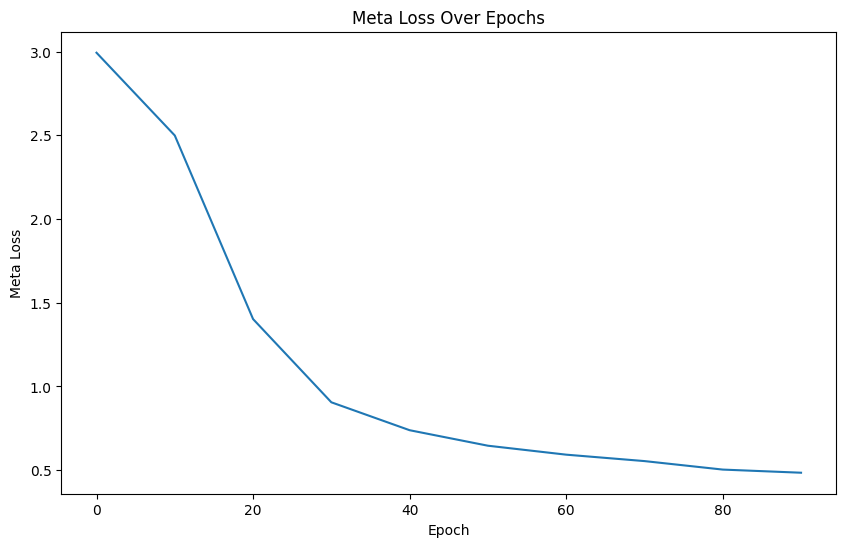

In [7]:
x_values = np.arange(0, len(maml.meta_losses) * 10, 10)  # 10 comes from plot_every

plt.figure(figsize=(10, 6))
plt.plot(x_values, maml.meta_losses)
plt.title("Meta Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Meta Loss")
plt.show()

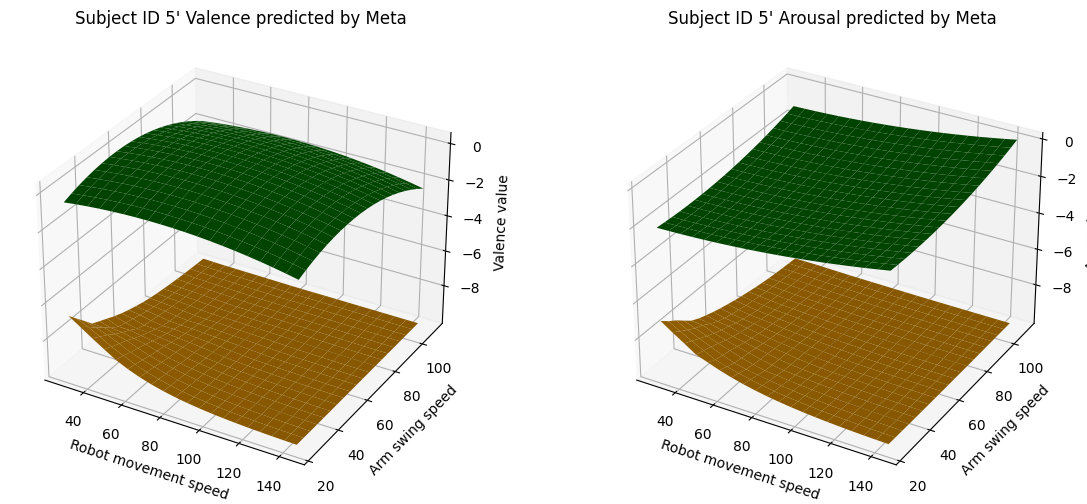

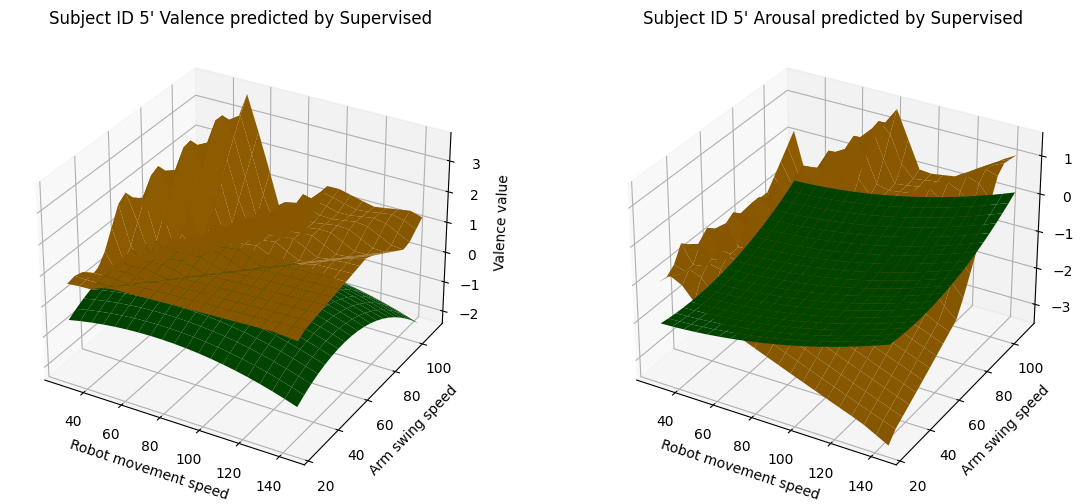

In [8]:
visualize_MAML(maml.net, seed=3, net_name="Meta", device=device)
visualize_MAML(net_supervised, seed=3, net_name="Supervised", device=device)